# Tutorial - Basic
---
Basic skills with _phalanx_.

## What _phalanx_ does

_phalanx_ simulates an quantum annealing process by generating a so-called Gibbs distribution.  This distribution reflects an invariant end of some qubits evolving under some certain topological structure.  

Users can define the inner structure of these qubits by setting the connection relationship.  If it's done, _phalanx_ generates a Hamiltonian for it, and calculates its eigenvalues and eigenstates.  

In _phalanx_, an annealer with $N$ qubits has a Hamiltonian like  

$$ H = \sum_i^Nh_iZ_i + \sum_{i,j}^N J_{ij}Z_iZ_j $$

Here $Z$ is the Pauli matrix,  

\begin{bmatrix}
1 & 0\\
0 &-1
\end{bmatrix}

$h$ and $J$ have similar meanings as in conventional Ising model, and are combined together as one upper triangular matrix which we call it the connection of the annealer.

An user can measure the final Gibbs distribution.  In this procedure, _phalanx_ will pick up an eigenstate in this distribution according to 

\begin{align*} \frac{e^{-\beta E}}{{\rm tr}(e^{-\beta H})} \end{align*}

$E$ is the eigenvalue for this eigenstate, $\beta$ is the inverse temperature.  Then makes it collapses to an observation basis state and return it.

By enough measurements, users can infer the Gibbs distribution, just like for a real annealing process.

## Create and set an annealer object

To start the simulation, we need define an annealer object at first.  An annealer is a collection of several qubits with an environment parameter $\beta$.  $\beta$ is usually named as inverse temperature, because in statistical mechanics $\beta = 1 / (k_BT)$.  So a lager $\beta$ means lower temperature, gives a narrow distribution.

In [1]:
from phalanx import Annealer

beta = 4.0
num_qubits = 3
anl = Annealer(beta, num_qubits)

The connection relationship is defined by the connection matrix, which is an upper triangular matrix.  The diagonal elements are $h$ in the Hamiltonian and the off-diagonal elements are $J$.

In [2]:
# Set connection of the qubits.
cnt = [
    [1,2,3],
    [0,1,2],
    [0,0,1]]
anl.set_connection(cnt)

## Check the connection

You can directly check the connection matrix or by an undirected graph.  The number on vertex denotes the qubit.

In [3]:
anl.connection

array([[1., 2., 3.],
       [0., 1., 2.],
       [0., 0., 1.]])

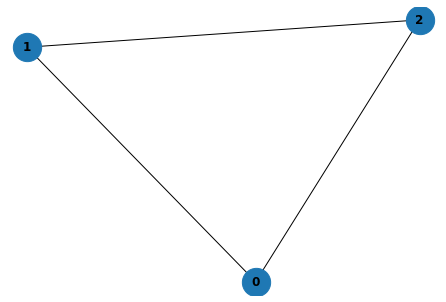

In [4]:
anl.draw_topology()

## The Hilbert space

After setting the connection, a Hamiltonian is calculated automatically from it, also the eigenvalues and the eigenstates.  You can directly check them.  They are all numpy arrays.

In [5]:
anl.hamiltonian

array([[10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -2.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -4.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -2.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -4.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]])

In [6]:
anl.eigenvalue

array([10., -2.,  0., -4., -2., -2., -4.,  4.])

In [7]:
anl.eigenstate

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

## Qubit notation

Since Hamiltonian in _phalanx_ is of Ising type, we denote a qubit's state by $1$ for up, $-1$ for down.

\begin{align*}
|1\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix},
\hspace{0.6cm}
|-1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}.
\end{align*}

For a system has more than one qubit, a state like $|1,1,-1\rangle$ means there are three qubits in 'up','up','down' state, respectively. And we take the leftmost one in the notation as the first one.

\begin{align*}
|1,-1\rangle = |1\rangle \otimes |-1\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \otimes \begin{bmatrix} 0 \\ 1 \end{bmatrix} = 
\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}
\end{align*}

Sometimes, for some problems, users need to transfer the notation from $\{1,-1\}$ to $\{1, 0\}$ according to 

$$ q = \frac{s+1}{2}. $$

Here $q \in \{1,0\}$, $s \in \{1, -1\}$.  Then a state like $|1,-1\rangle$ becomes to $|1, 0\rangle$.  In this notation, $1$ means 'up', $0$ means 'down'.

## Measurement

In our context, information of a simulated annealing end is acquired immediately after the connection is set. A measurement on the annealer will return a qubit configuration according to the former information. 

In [8]:
anl.measure()

[1, -1, -1]

We use **1** to denote qubit up state, **-1** for down.

You can repeat the measurement to acess more information about the Gibbs distribution.

In [9]:
for i in range(6):
    print(anl.measure())

[1, -1, -1]
[1, -1, -1]
[-1, -1, 1]
[1, -1, -1]
[1, -1, -1]
[-1, -1, 1]


Also there is a graph view for the last outcome.

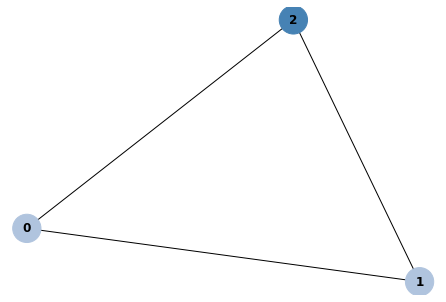

In [10]:
anl.draw_result()

We use deep color for **1** and light color for **-1**.